# AAPL

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [5]:
df = pd.read_csv('AAPL.csv') # import df

In [6]:
df.head() # print the first five rows of the df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


In [7]:
df.shape # df size

(254, 7)

In [8]:
df.info() # df infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [9]:
df.describe() # statistical summary of the df

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,95.177963,96.570266,93.828021,95.260718,93.308248,1.573412e+08
std,22.014834,22.099098,21.579560,21.810137,21.574201,6.978352e+07
min,57.020000,57.125000,53.152500,56.092499,54.776802,4.669130e+07
25%,76.863749,77.998749,76.109377,77.379377,75.390965,1.107637e+08
50%,91.264999,92.793751,90.738750,91.421249,89.518562,1.379199e+08
75%,115.924374,117.275000,114.129997,115.739374,113.534906,1.870393e+08
max,138.050003,138.789993,134.339996,136.690002,134.317825,4.265100e+08


In [10]:
# for loop to run through all columns of df and add a line between them

for col in df.columns: 
    print('flooking at column {col}')
    print(df[col].value_counts())
    print('_____________')

flooking at column {col}
Date
2019-12-31    1
2020-01-02    1
2020-01-03    1
2020-01-06    1
2020-01-07    1
             ..
2020-12-24    1
2020-12-28    1
2020-12-29    1
2020-12-30    1
2020-12-31    1
Name: count, Length: 254, dtype: int64
_____________
flooking at column {col}
Open
122.599998    2
115.550003    2
113.910004    2
120.500000    2
74.959999     1
             ..
131.320007    1
133.990005    1
138.050003    1
135.580002    1
134.080002    1
Name: count, Length: 250, dtype: int64
_____________
flooking at column {col}
High
80.860001     2
125.180000    2
116.000000    2
116.550003    2
75.144997     1
             ..
133.460007    1
137.339996    1
138.789993    1
135.990005    1
134.740005    1
Name: count, Length: 250, dtype: int64
_____________
flooking at column {col}
Low
110.000000    2
114.589996    2
118.150002    2
114.129997    2
116.809998    2
             ..
131.100006    1
133.509995    1
134.339996    1
133.399994    1
131.720001    1
Name: count, Lengt

In [11]:
df.isnull().sum() # check for missing data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df['Date'] = pd.to_datetime(df['Date']) 

In [13]:
df.info() # df infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   Open       254 non-null    float64       
 2   High       254 non-null    float64       
 3   Low        254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Adj Close  254 non-null    float64       
 6   Volume     254 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [14]:
# copy the df 
df_AAPL = df.copy()

In [15]:
df_AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


In [16]:
df_AAPL.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## EDA

Text(0.5, 1.0, 'Close Value')

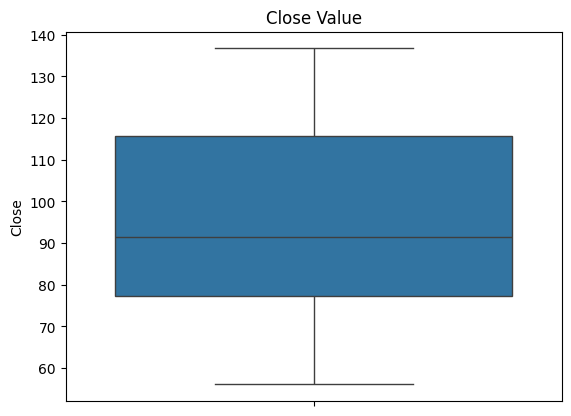

In [17]:
sns.boxplot(df_AAPL['Close']).set_title('Close Value')

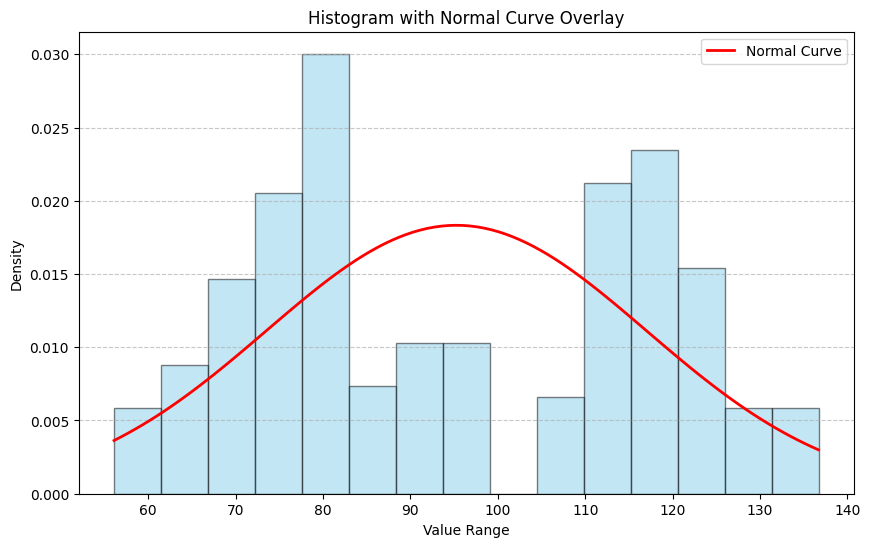

In [18]:
from scipy import stats

## Note from CE: The second step is visualise how the data is distributed using a histogram
# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_AAPL['Close'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# calculating the  normal distribution parameters 
mu, std = stats.norm.fit(df_AAPL['Close'])

# Create a range of x values for the normal curve
x = np.linspace(min(df_AAPL['Close']), max(df_AAPL['Close']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

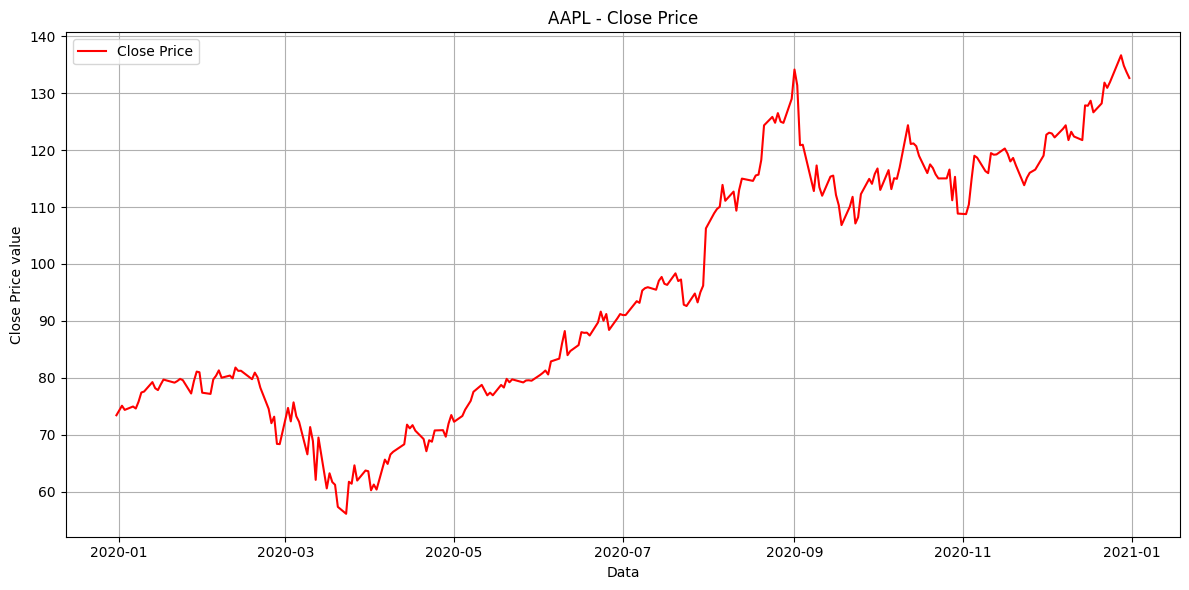

In [19]:
# # Closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df_AAPL['Date'], df_AAPL['Close'], label='Close Price', color='red')
plt.title('AAPL - Close Price')
plt.xlabel('Data')
plt.ylabel('Close Price value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

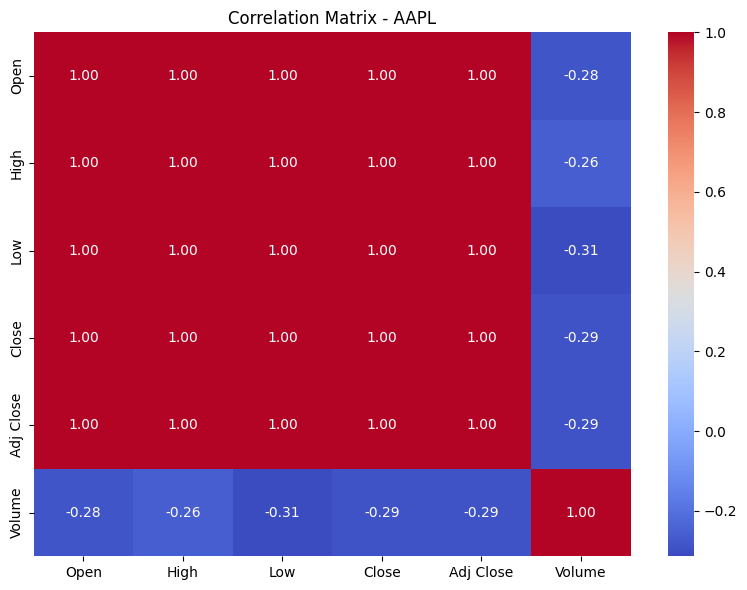

In [20]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_AAPL.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - AAPL')
plt.tight_layout()
plt.show()

In [21]:

df_AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


In [23]:
# export the DataFrame df_new to a CSV file
csv_AAPL = "df_AAPL.csv"
df_AAPL.to_csv(csv_AAPL, index=False)

## Sentiment Analysis

In [25]:
pip install --user -u nltk


Usage:   
  /home/hduser/novo/venv/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /home/hduser/novo/venv/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /home/hduser/novo/venv/bin/python -m pip install [options] [-e] <vcs project url> ...
  /home/hduser/novo/venv/bin/python -m pip install [options] [-e] <local project path> ...
  /home/hduser/novo/venv/bin/python -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'nltk'